In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x_data = np.linspace(0.0,10.0,10000)

In [3]:
# x_data has 10000 value
x_data

array([  0.00000000e+00,   1.00010001e-03,   2.00020002e-03, ...,
         9.99799980e+00,   9.99899990e+00,   1.00000000e+01])

In [4]:
noise = np.random.randn(len(x_data))

In [5]:
noise

array([-0.57874752, -0.3421946 , -0.79263373, ..., -0.48373995,
       -1.32615605, -0.68754307])

In [6]:
# y=mx+b
#added noise 
y_true = (0.5*x_data) +5 + noise

In [7]:
x_df = pd.DataFrame(data=x_data,columns=['X Data'])
y_df = pd.DataFrame(data=y_true,columns=['Y'])
my_data = pd.concat([x_df,y_df],axis=1)

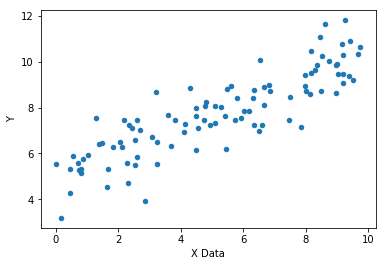

In [8]:
my_data.sample(n=100).plot(kind='scatter',x='X Data',y='Y')

In [9]:
batch_size = 8

In [10]:
m = tf.Variable(0.81)
b = tf.Variable(0.67) 

In [11]:
xph = tf.placeholder(tf.float32,[batch_size])
yph = tf.placeholder(tf.float32,[batch_size])

In [12]:
y_model = m*xph+b

In [13]:
error = tf.reduce_sum(tf.square(yph-y_model))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)
init = tf.global_variables_initializer()

In [14]:
with tf.Session() as sess:
    sess.run(init)
    batches = 1000
    for i in range(batches):
        rand_ind = np.random.randint(len(x_data),size = batch_size)
        feed = {xph:x_data[rand_ind],yph:y_true[rand_ind]}
        sess.run(train,feed_dict = feed)
    mobel_m,mobel_b = sess.run([m,b])

In [15]:
mobel_m,mobel_b

(0.48698208, 4.8849149)

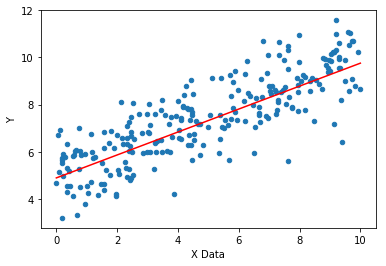

In [16]:
y_hat = x_data*mobel_m+mobel_b
my_data.sample(250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(x_data,y_hat,'r')